In [1]:
import pygmt
import pyshtools as pysh
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


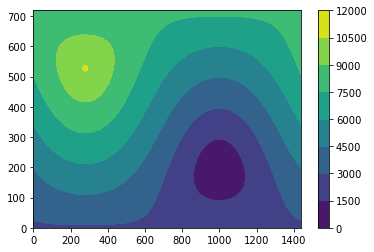

10669.445
10649.999095669398


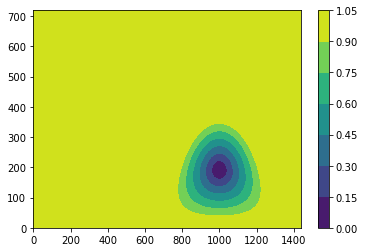

In [2]:
HellasDistance = xr.open_dataarray('DistanceToHellasCentre.nc')

plt.contourf(HellasDistance.data)
plt.colorbar()
plt.show()

print(HellasDistance.data.max())
print(3390*np.pi)

inner_limit = 100.
outer_limit = 2500.

ramping = HellasDistance.data.copy()
ramping[ramping<inner_limit] = inner_limit
ramping[ramping>outer_limit] = outer_limit
ramping = (ramping-inner_limit)/(outer_limit-inner_limit)

plt.contourf(ramping)
plt.colorbar()
plt.show()

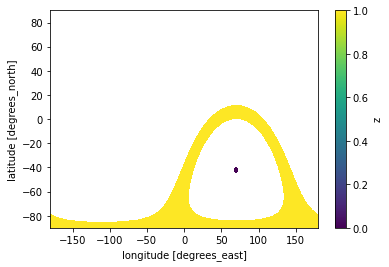

In [3]:
msk = HellasDistance.copy()

ramping = HellasDistance.data.copy()
ramping[HellasDistance.data>outer_limit] = 1.
ramping[HellasDistance.data>outer_limit*1.25] = np.nan
ramping[HellasDistance.data<outer_limit] = np.nan
ramping[HellasDistance.data<inner_limit] = 0.

msk.data = ramping

msk.plot()

In [4]:
#mskfill = pygmt.grdfill(msk, mode='n')
#mskfill.plot()

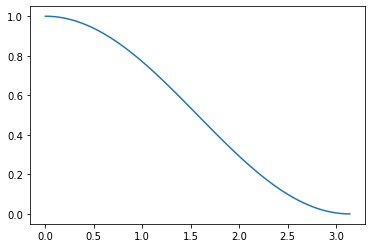

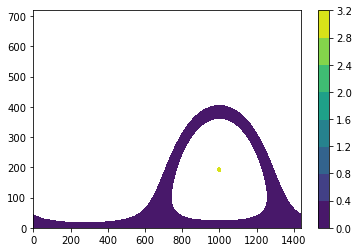

In [5]:
arrrr = np.linspace(0,np.pi,100)
plt.plot(arrrr,(np.cos(arrrr)+1)/2.)
plt.show()

ramping = HellasDistance.data.copy()
#ramping[ramping<inner_limit] = 0
#ramping[HellasDistance.data>outer_limit*1.25] = np.nan
#ramping[ramping>outer_limit] = np.pi
#ramping = (ramping-inner_limit)/(outer_limit-inner_limit)

ramping[HellasDistance.data>outer_limit] = 0.
ramping[HellasDistance.data<outer_limit] = np.nan
ramping[HellasDistance.data<inner_limit] = np.pi

ind_hole = np.isnan(ramping.flatten())

ramping[HellasDistance.data>outer_limit*1.25] = np.nan

plt.contourf(ramping)
plt.colorbar()
plt.show()

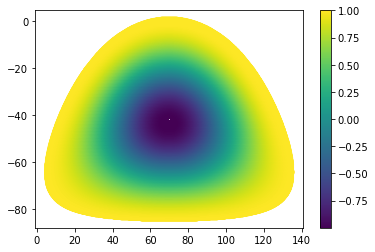

In [6]:
import stripy
from gprm.utils.raster import write_xyz_file
import ptt.utils.call_system_command as call_system_command

lons,lats = np.meshgrid(msk.lon.data, msk.lat.data)

def interpolate_hole(lons, lats, ramping, ind_hole):

    ind = np.isnan(ramping.flatten())
    basis_X = lons.flatten()[~ind]
    basis_Y = lats.flatten()[~ind]
    basis_Z = ramping.flatten()[~ind]   

    #write_xyz_file('./tmp.xyz',zip(basis_X,basis_Y,basis_Z))
    #call_system_command(['gmt',
    #                     'sphinterpolate',
    #                     './tmp.xyz',
    #                     '-RDistanceToHellasCentre.nc',
    #                     '-Q0',
    #                     '-G./tmp.nc',
    #                     '-V'])

    target_X = lons.flatten()[ind_hole]
    target_Y = lats.flatten()[ind_hole]

    tri = stripy.sTriangulation(lons=np.radians(basis_X.flatten()), lats=np.radians(basis_Y.flatten()))

    ramp_interp = tri.interpolate(np.radians(target_X), np.radians(target_Y),
                                          zdata=basis_Z,
                                          order=1)[0]
    
    ramping[np.unravel_index(ind_hole.nonzero(), ramping.shape)] = ramp_interp
    
    return ramping


#plt.scatter(target_X, target_Y, c=np.cos(ramp_interp))
#plt.scatter(target_X, target_Y, c=ramp_interp)
#plt.colorbar()
#plt.show()
#plt.plot(np.cos(ramp_interp))
#plt.show()



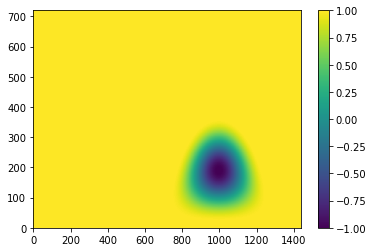

In [7]:
ramping[HellasDistance.data>outer_limit*1.25] = 0.

ramping[np.unravel_index(ind_hole.nonzero(), ramping.shape)] = ramp_interp

#plt.scatter(lons,lats,c=ramping)
plt.pcolormesh(np.cos(ramping))
plt.colorbar()


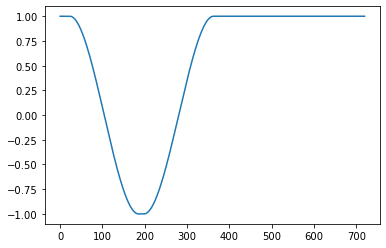

In [8]:
plt.plot(np.cos(ramping)[:,1000])

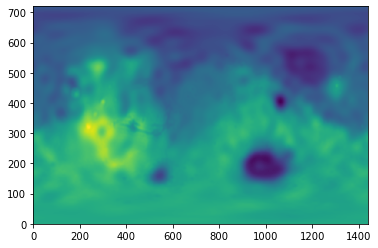

In [9]:
HM = np.loadtxt('grids/W19_l30.xyz')

#lons = HM[:,0].reshape(720,1440)
#lats = HM[:,1].reshape(720,1440)
sus = HM[:,2].reshape(720,1440)


sus = np.hstack((sus[:,720:],sus[:,:720]))
#lons = np.hstack((lons[:,720:],lons[:,:720]))

sus_in = sus.copy()

plt.pcolormesh(sus)
plt.show()


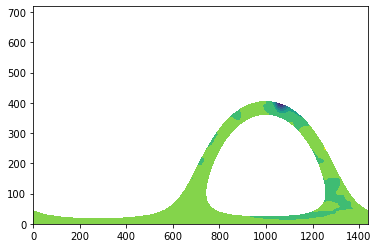

In [10]:
#sus[HellasDistance.data>outer_limit] = 1.
sus[HellasDistance.data<outer_limit] = np.nan
#sus[HellasDistance.data<inner_limit] = np.

ind_hole = np.isnan(sus.flatten())

sus[HellasDistance.data>outer_limit*1.25] = np.nan

plt.contourf(sus)


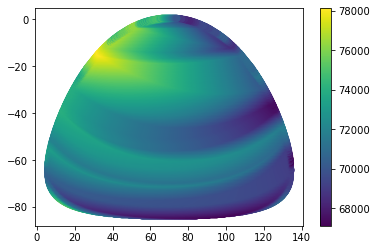

In [11]:
ind = np.isnan(sus.flatten())
basis_X = lons.flatten()[~ind]
basis_Y = lats.flatten()[~ind]
basis_Z = sus.flatten()[~ind] 

target_X = lons.flatten()[ind_hole]
target_Y = lats.flatten()[ind_hole]

tri = stripy.sTriangulation(lons=np.radians(basis_X.flatten()), lats=np.radians(basis_Y.flatten()))

sus_interp = tri.interpolate(np.radians(target_X), np.radians(target_Y),
                                      zdata=basis_Z,
                                      order=1)[0]

plt.scatter(target_X, target_Y, c=sus_interp)
plt.colorbar()
plt.show()


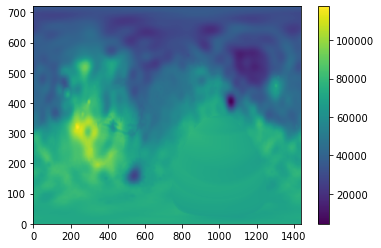

In [12]:

sus_in[np.unravel_index(ind_hole.nonzero(), ramping.shape)] = sus_interp

#plt.scatter(lons,lats,c=ramping)
plt.pcolormesh(sus_in)
plt.colorbar()
